In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DataSet= pd.read_csv('/content/drive/MyDrive/SUV_Purchase.csv')

In [3]:
DataSet.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
DataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


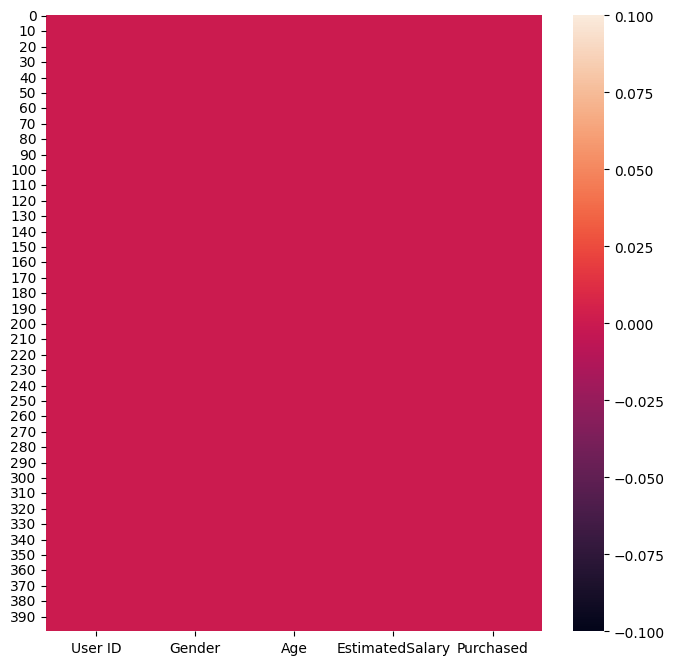

In [5]:
# visualizing

import seaborn as sns
import matplotlib.pyplot as plt

def get_heatmap(df):
  plt.figure(figsize=(8,8))
  sns.heatmap(df.isnull())
  return plt.show()
  

get_heatmap(DataSet)

In [6]:
#preprocessing


#Converting text to numeric

from sklearn import preprocessing
LE=preprocessing.LabelEncoder()

DataSet.Gender=LE.fit_transform(DataSet.Gender)




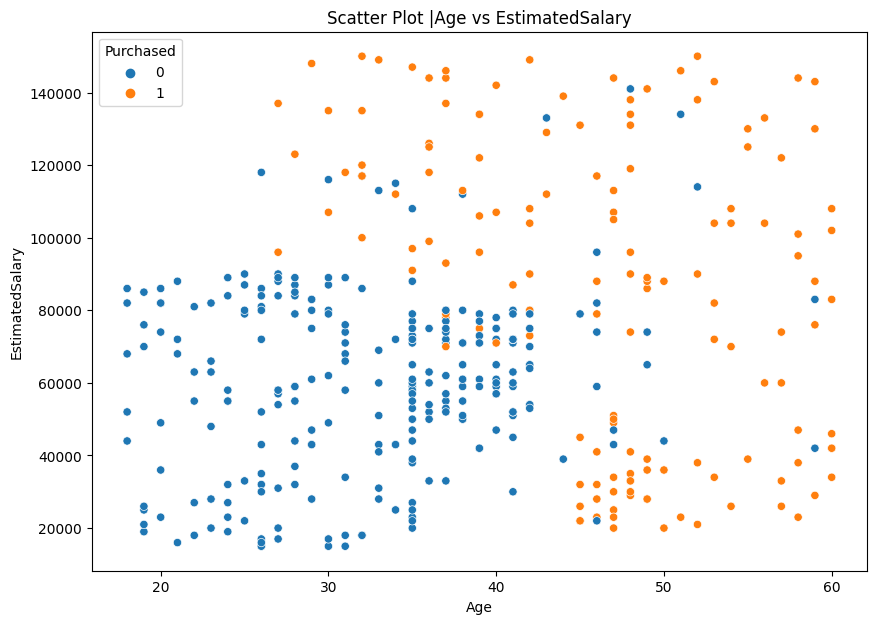

In [7]:
#visualization

def plot_vs(frame, col1, col2, hue):
  plt.figure(figsize=(10,7))
  sns.scatterplot(data=frame,x=col1,y=col2,hue=hue)
  plt.title(f"Scatter Plot |{col1} vs {col2}")

plot_vs(DataSet,'Age','EstimatedSalary','Purchased')


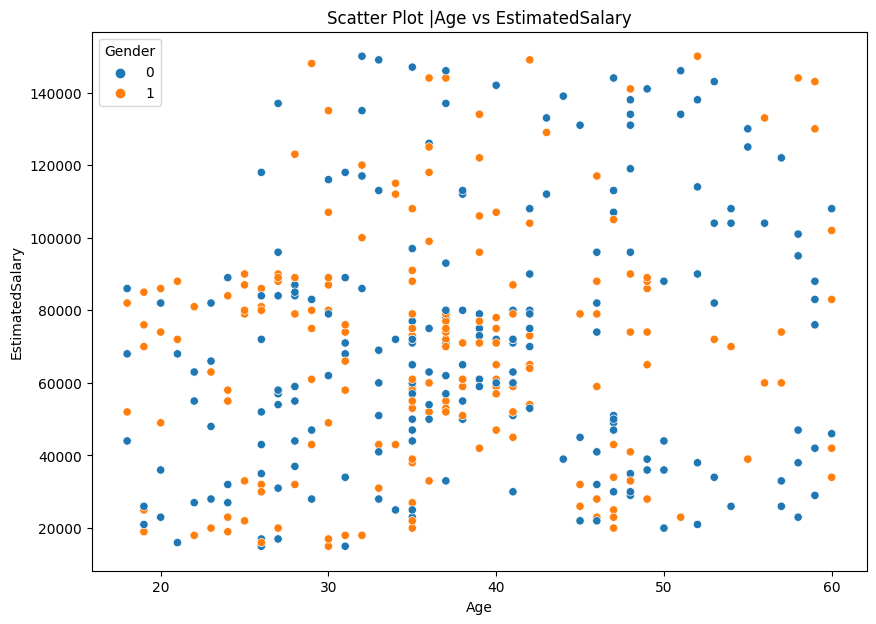

In [8]:
plot_vs(DataSet,'Age','EstimatedSalary','Gender')

In [9]:
# feature Engineering: removing columns

Dataset=DataSet.drop(['User ID','Gender'],axis=1)

Dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [10]:
# Loading the data
X=np.array(DataSet[['Age','EstimatedSalary']])
Y=np.array(DataSet[['Purchased']])


In [11]:
# Splitting the Dataset in train and test

from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [12]:
#normalizing the data - Standard Scaler
from sklearn.preprocessing import MinMaxScaler
smm=MinMaxScaler()
X_train=smm.fit_transform(X_train)
X_test=smm.transform(X_test)

In [13]:
X_test

array([[0.28571429, 0.53333333],
       [0.47619048, 0.25925926],
       [0.4047619 , 0.44444444],
       [0.28571429, 0.47407407],
       [0.4047619 , 0.25925926],
       [0.21428571, 0.03703704],
       [0.30952381, 0.        ],
       [0.42857143, 0.95555556],
       [0.        , 0.39259259],
       [0.69047619, 0.20740741],
       [0.28571429, 0.25185185],
       [0.23809524, 0.2962963 ],
       [0.45238095, 0.2962963 ],
       [0.5       , 0.45925926],
       [0.04761905, 0.52592593],
       [0.33333333, 0.75555556],
       [0.45238095, 0.45925926],
       [0.02380952, 0.51851852],
       [0.88095238, 0.85185185],
       [0.4047619 , 0.05185185],
       [0.4047619 , 0.23703704],
       [0.69047619, 0.95555556],
       [0.54761905, 0.26666667],
       [0.69047619, 0.66666667],
       [0.11904762, 0.0962963 ],
       [0.73809524, 0.93333333],
       [0.23809524, 0.53333333],
       [0.26190476, 0.48148148],
       [0.45238095, 0.34814815],
       [0.33333333, 0.52592593],
       [0.

In [14]:
from sklearn.linear_model import LogisticRegression
clf= LogisticRegression()

In [15]:
clf.fit(X_train,Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [16]:
Y_pred=clf.predict(X_test)


In [17]:
clf.score(smm.transform(X),Y)

0.8225

In [18]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#confusion matrix for train set

cm1=confusion_matrix(Y_train,clf.predict(X_train))
cm1

array([[184,  15],
       [ 50,  71]])

In [19]:
#confusion matrix for test set

cm2=confusion_matrix(Y_test,clf.predict(X_test))

cm2

array([[58,  0],
       [ 6, 16]])

In [23]:
#confusion matrix for overall data
actual=Y
predicted=clf.predict(smm.transform(X))

cm=confusion_matrix(actual,predicted)
cm

array([[242,  15],
       [ 56,  87]])

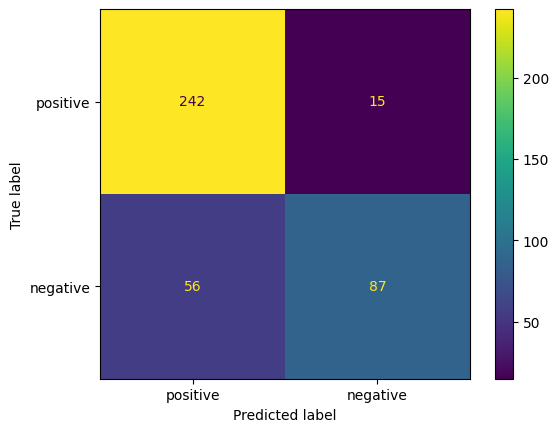

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['positive','negative'])
cm_display.plot()

In [28]:
print(classification_report(actual,predicted))


              precision    recall  f1-score   support

           0       0.81      0.94      0.87       257
           1       0.85      0.61      0.71       143

    accuracy                           0.82       400
   macro avg       0.83      0.78      0.79       400
weighted avg       0.83      0.82      0.81       400

